<a href="https://colab.research.google.com/github/sabudev/CAIF/blob/main/Team_3_CAIF_Module3_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 3 - CAIF Module 3 Model training

#### In this Python notebook we look at a tmdb dataset that contains diverse attributes of selected movies. The notebook focuses on doing simple descriptive analysis of the data, including summarization and visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We had to adjust the column headings of the CSV files to match between datasets, for e.g. TMDB ID to movie_id, add missing column titles etc. 
We also had to remove some junk data from the CSV files as they were not in the column format

### Load all available tmdb data from git to access the data files

In [5]:
! rm -Rf ./CAIF
! git clone https://github.com/sabudev/CAIF.git

Cloning into 'CAIF'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 37 (delta 14), reused 17 (delta 8), pack-reused 0
Unpacking objects: 100% (37/37), done.


### Read in tmdb_overview_keywords.csv data file. The head() function shows the first few rows of data

Use escapechar='\\' to accomdate for escaped characters in the CSV file, if we don't provide this it was failing to read data correctly from file.

In [6]:
overview_keywords_csv = pd.read_csv('CAIF/tmdb_overview_keywords.csv', escapechar='\\')
overview_keywords_csv.head()

,id,movie_id,keyword,title
0,0,19995,22nd century,Avatar
1,1,19995,paraplegic Marine,Avatar
2,2,19995,orders,Avatar
3,3,19995,moon Pandora,Avatar
4,4,19995,unique mission,Avatar


#### Count number of records in overview_keywords_csv

In [7]:
overview_keywords_csv.shape

(50258, 4)

### Read in tmdb_keywords.csv data file. The head() function shows the first few rows of data

In [8]:
keywords_csv = pd.read_csv('CAIF/tmdb_keywords.csv', escapechar='\\')
keywords_csv.head()

,id,keyword,movie_id,title
0,0,culture clash,19995,Avatar
1,1,future,19995,Avatar
2,2,space war,19995,Avatar
3,3,space colony,19995,Avatar
4,4,society,19995,Avatar


In [9]:
keywords_csv[:10]

,id,keyword,movie_id,title
0,0,culture clash,19995,Avatar
1,1,future,19995,Avatar
2,2,space war,19995,Avatar
3,3,space colony,19995,Avatar
4,4,society,19995,Avatar
5,5,space travel,19995,Avatar
6,6,futuristic,19995,Avatar
7,7,romance,19995,Avatar
8,8,space,19995,Avatar
9,9,alien,19995,Avatar


### Reorder the columns of overview_keywords_csv to match keywords_csv ["id","keyword","movie_id","title"]

In [10]:
col_titles=["id","keyword","movie_id","title"]
overview_keywords_csv=overview_keywords_csv.reindex(columns=col_titles)
overview_keywords_csv.head()

,id,keyword,movie_id,title
0,0,22nd century,19995,Avatar
1,1,paraplegic Marine,19995,Avatar
2,2,orders,19995,Avatar
3,3,moon Pandora,19995,Avatar
4,4,unique mission,19995,Avatar


### Lets combine the overview_keywords_csv and keywords_csv dataframes as they both contain the same columns  id, keyword, movie_id, title

In [11]:
keywords_df = overview_keywords_csv.append(keywords_csv)
keywords_df.head()

,id,keyword,movie_id,title
0,0,22nd century,19995,Avatar
1,1,paraplegic Marine,19995,Avatar
2,2,orders,19995,Avatar
3,3,moon Pandora,19995,Avatar
4,4,unique mission,19995,Avatar


### Sort the resulting dataset on title, so we can reindex the id column

In [12]:
keywords_df.sort_values(by=['title'], inplace=True)
keywords_df.head()

,id,keyword,movie_id,title
44580,44580,old girls,301325,#Horror
44585,44585,compulsive addiction of an online social media...,301325,#Horror
44584,44584,night of insanity,301325,#Horror
44583,44583,moment of cyber,301325,#Horror
44582,44582,year,301325,#Horror


### Drop the id column, Add new id column with new sequential index

In [13]:
del keywords_df['id']
keywords_df['id'] = np.arange(len(keywords_df))
keywords_df.head()

,keyword,movie_id,title,id
44580,old girls,301325,#Horror,0
44585,compulsive addiction of an online social media...,301325,#Horror,1
44584,night of insanity,301325,#Horror,2
44583,moment of cyber,301325,#Horror,3
44582,year,301325,#Horror,4


## Lets generate a word cloud of all the keywords in the combined dataframe

(-0.5, 399.5, 199.5, -0.5)

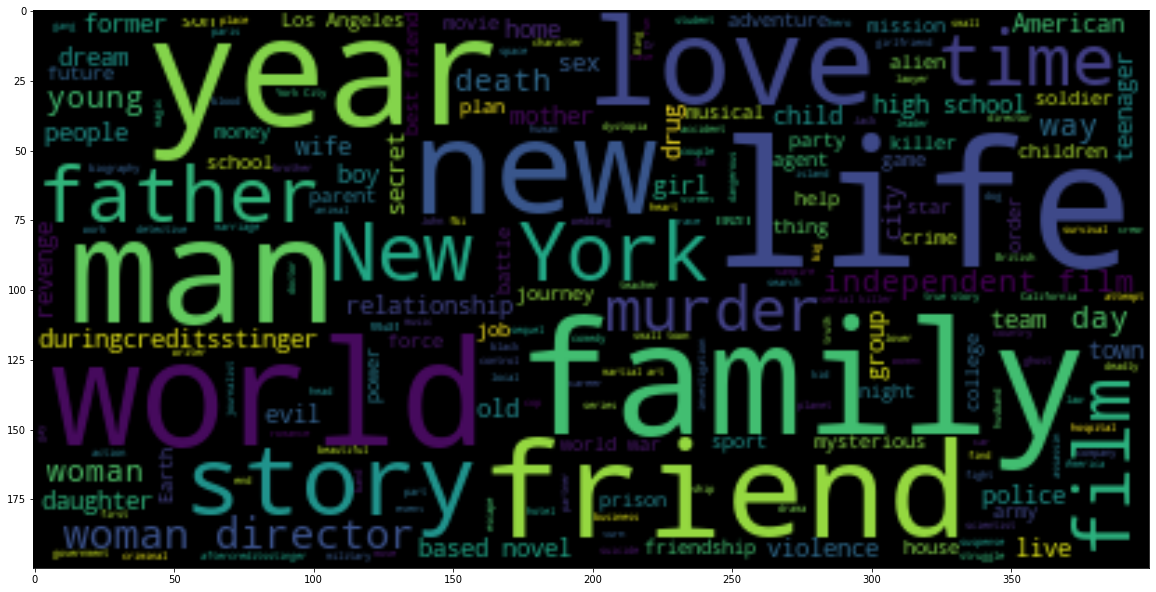

In [14]:
wordcloud = WordCloud().generate(' '.join(keywords_df['keyword']))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("on")

This indicates there is more data cleanup required for example 'S is showing up as a keyword, need to remove non-ascii characters before feeding data into model

### Read tmdb genres csv data file

In [15]:
genres_csv = pd.read_csv('CAIF/tmdb_genres.csv', escapechar='\\')
genres_csv.head()

,id,genre,movie_id,title
0,0,Action,19995,Avatar
1,1,Adventure,19995,Avatar
2,2,Fantasy,19995,Avatar
3,3,SciFi,19995,Avatar
4,4,Adventure,285,Pirates of the Caribbean: At World's End


### Lets join the genres data with keywords data, left join by movie_id and title columns

In [16]:
genre_keywords_df = keywords_df.merge(genres_csv, on=['movie_id','title'], how='left')
genre_keywords_df.head()

,keyword,movie_id,title,id_x,id_y,genre
0,old girls,301325,#Horror,0,11094.0,Drama
1,old girls,301325,#Horror,0,11095.0,Mystery
2,old girls,301325,#Horror,0,11096.0,Horror
3,old girls,301325,#Horror,0,11097.0,Thriller
4,compulsive addiction of an online social media...,301325,#Horror,1,11094.0,Drama


### Plot bar graph for Number of Movies by Genre

Text(0, 0.5, 'Title Count')

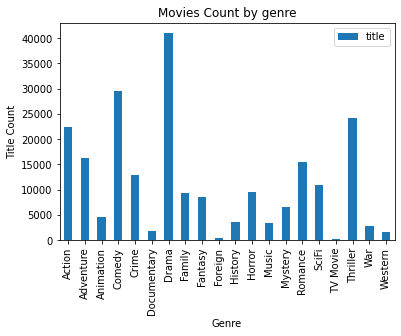

In [17]:
genre_keywords_df[['genre','title']].groupby('genre').count().plot(kind='bar',title='Movies Count by genre')
plt.xlabel('Genre')
plt.ylabel('Title Count')

### Read tmdb_attributes CSV data file

In [24]:
attributes_csv = pd.read_csv('CAIF/tmdb_attributes.csv', escapechar='\\')

attributes_csv.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


**Plot the histogram of runtime. Here we are treating runtime as a continious variable.**

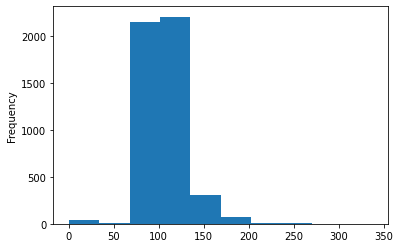

In [19]:
attributes_csv['runtime'].plot.hist()

**Fancy histogram with header and axis labels. A similar logic can be used to construct any type of bar chart. In this case, we are treating points as a discrete (nominal) variable.**

Text(0, 0.5, 'Frequency')

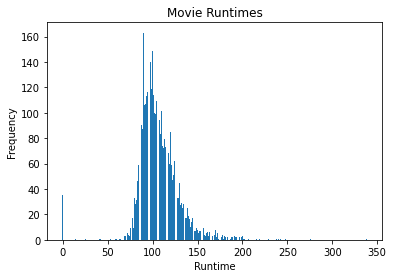

In [20]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = attributes_csv['runtime'].value_counts() 

# get x and y data 
runtime = data.index 
frequency = data.values 

# create bar chart 
ax.bar(runtime, frequency) 

# set title and labels 
ax.set_title('Movie Runtimes') 
ax.set_xlabel('Runtime') 
ax.set_ylabel('Frequency')

### Check the correlation between numerical features to understand relationships in the data

Text(0.5, 1.0, 'CORRELATION HEATMAP')

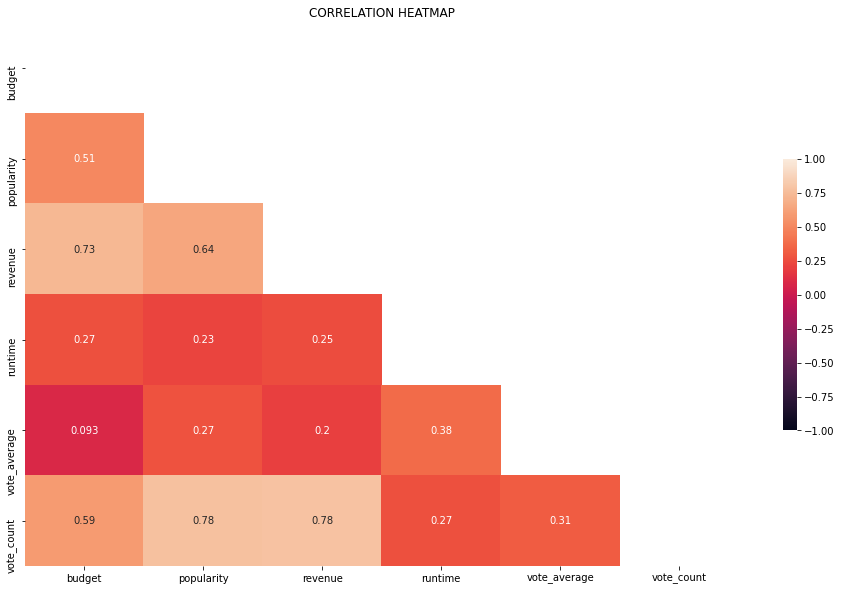

In [21]:
plt.figure(figsize=(16, 10))
corr = attributes_csv.drop(["movie_id"], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cbar_kws={"shrink": .5})
heatmap.set_title('CORRELATION HEATMAP')

Indicates there is correlation between budget and revenue. Also higher vote_count yields better revenue and popularity.